In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing Phase

In [257]:
#importing the dataset & showing head()
df = pd.read_csv('titanic-passengers.csv',sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [258]:
#showing some general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [259]:
#for each column wee calculate the sum of the missing value in order to replace it
#as we see there is two columns with missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [260]:
#for the numirical values wee replace them with mean or mediane or mode
df['Age'].fillna(df['Age'].mean(),inplace = True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [261]:
#for the categorical values we replace the missing with the frequente value
#calculate the occurence of each value
print(df['Cabin'].value_counts())
print(df['Embarked'].value_counts())

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
C22 C26        3
              ..
B39            1
E49            1
D56            1
E36            1
E12            1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [262]:
#replace the missing values with the frequente one in each columns
df['Cabin'].fillna('G6',inplace = True)
df['Embarked'].fillna('S',inplace = True)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


In [263]:
#verification
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Visualization Phase

In [264]:
df.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


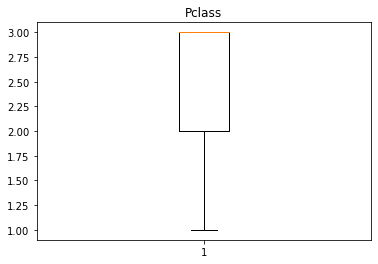

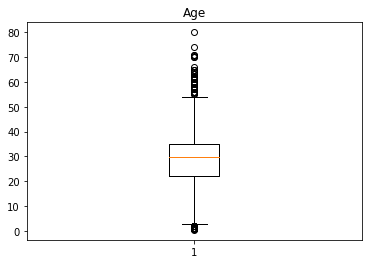

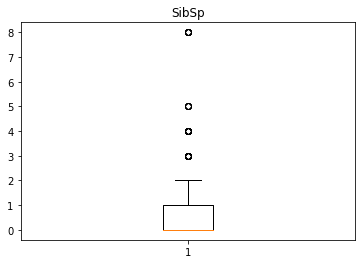

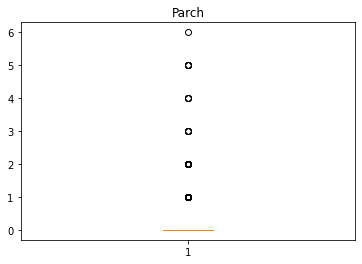

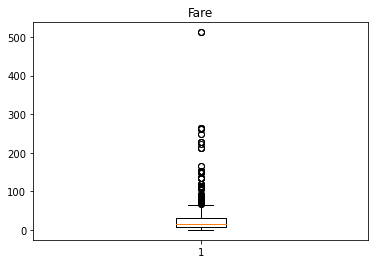

In [265]:
#studying the distribution of the most important features
n_features=['Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']
c_features=['Survived', 'Sex', 'Embarked']
#for the numirical variables we use the boxplot
for i in n_features:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    

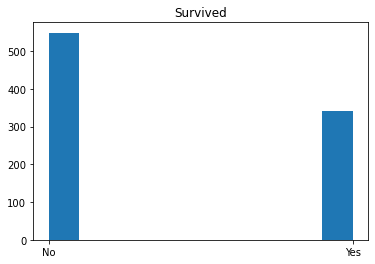

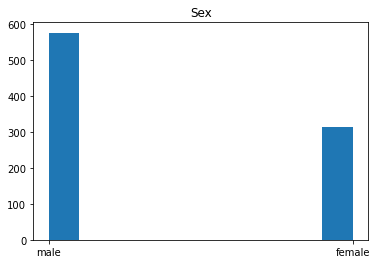

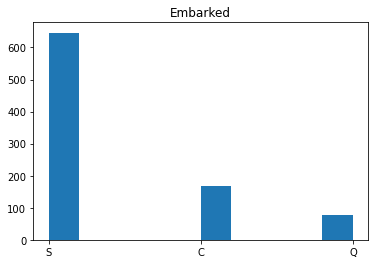

In [266]:
#for the categorical variable we use the histogramme 
for i in c_features:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

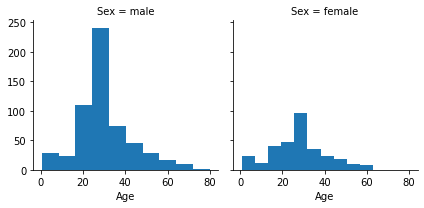

In [267]:
#correlation between Sex and Age 
g1 = sns.FacetGrid(new_df,col='Sex')
g1.map(plt.hist,'Age',bins=10)

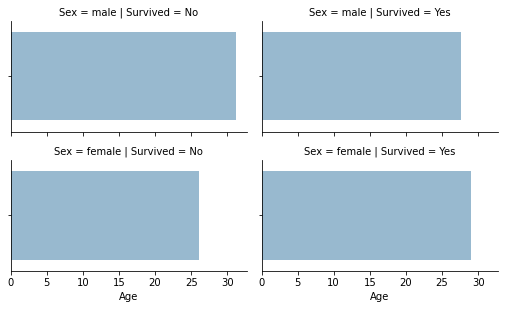

In [268]:
#visualization of correlation multiple between survival and sex,age 

grid = sns.FacetGrid(df, row="Sex", col="Survived", height=2.2, aspect=1.6)
grid.map(sns.barplot,'Age', alpha=.5, ci=None,order=None)
grid.add_legend()

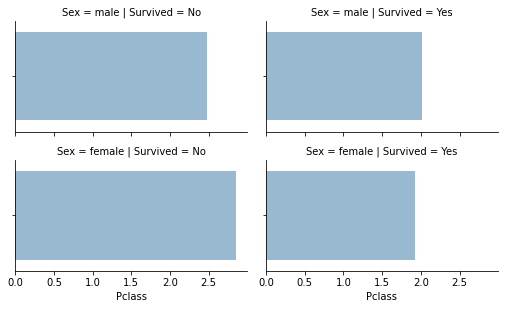

In [269]:
#visualization of correlation multiple between survival and sex,Pclass 

grid = sns.FacetGrid(df, row="Sex", col="Survived", height=2.2, aspect=1.6)
grid.map(sns.barplot,'Pclass', alpha=.5, ci=None,order=None)
grid.add_legend()

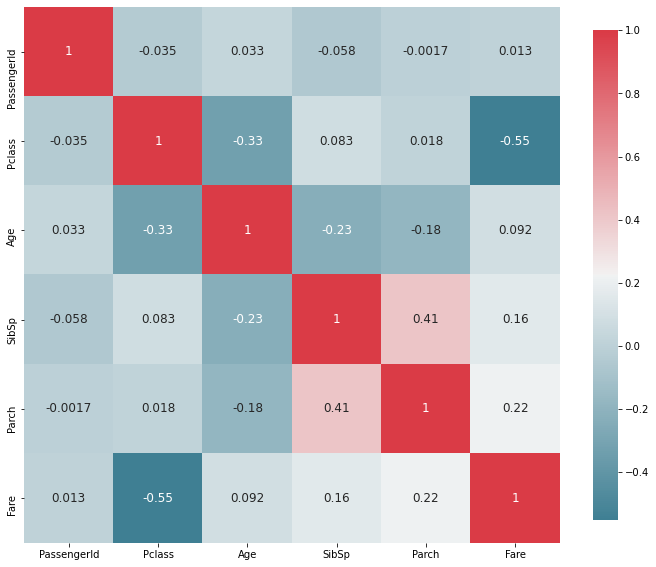

In [270]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

In [271]:
#The relation between Pclass and survived using groupby
cleanup={"Survived":{"Yes":1, "No": 0}}  
df.replace(cleanup, inplace=True)


In [272]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


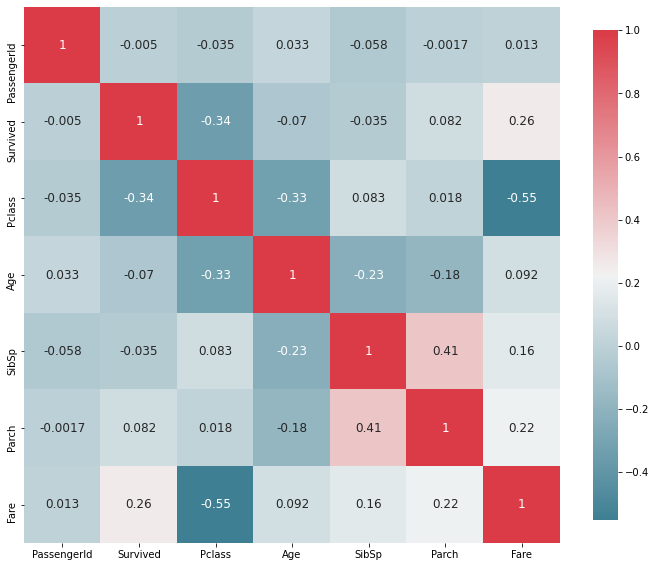

In [273]:
plot_correlation_map(df)

In [274]:
#droping the useless columns and get the new_df
new_df= df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1)
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28.000000,0,0,13.0000,S
1,0,3,male,25.000000,0,0,7.6500,S
2,0,3,male,20.000000,0,0,7.8542,S
3,0,3,female,29.000000,0,4,21.0750,S
4,0,1,male,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,C
887,0,3,male,22.000000,0,0,7.2292,C
888,0,3,female,30.000000,0,0,8.6625,S
889,0,3,male,29.699118,0,0,7.8958,S


In [275]:
#getting the differents titles from column Name 
l=[]
for i in range(len(df["Name"].values)):
    l.append(df["Name"].values[i].split(',')[1].split('.')[0])
  

In [276]:
#Create a new column named Title for my dataSet assign it to the new_df
new_df=new_df.assign(Title=l)
new_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.000000,0,0,13.0000,S,Mr
1,0,3,male,25.000000,0,0,7.6500,S,Mr
2,0,3,male,20.000000,0,0,7.8542,S,Mr
3,0,3,female,29.000000,0,4,21.0750,S,Mrs
4,0,1,male,31.000000,1,0,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,C,Mrs
887,0,3,male,22.000000,0,0,7.2292,C,Mr
888,0,3,female,30.000000,0,0,8.6625,S,Miss
889,0,3,male,29.699118,0,0,7.8958,S,Mr


In [277]:
#VISUALIZATION OF THE CORRELATION BETWEEN TITLE AND OTHER FEATURES
new_df["Title"].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Ms                1
 Lady              1
 Jonkheer          1
 Don               1
 Capt              1
 Mme               1
 Sir               1
 the Countess      1
Name: Title, dtype: int64

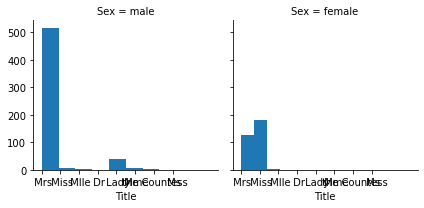

In [278]:
g1 = sns.FacetGrid(new_df,col='Sex')
g1.map(plt.hist,'Title',bins=10)

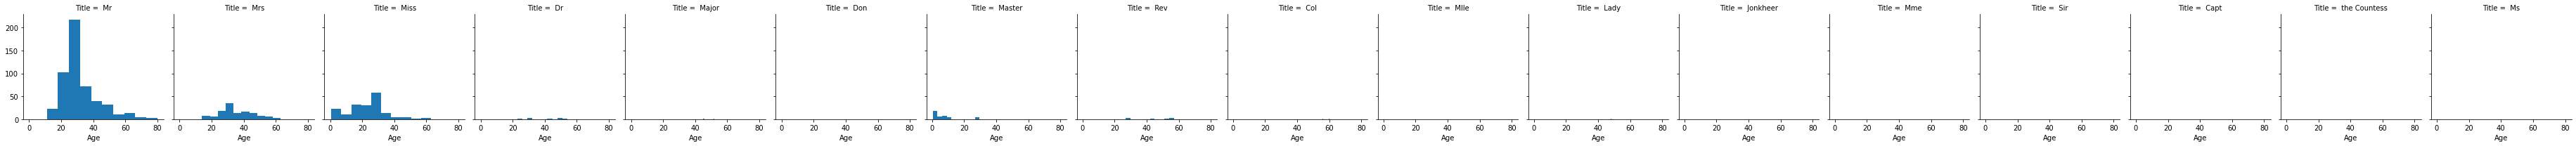

In [279]:
g1 = sns.FacetGrid(new_df,col='Title')
g1.map(plt.hist,'Age',bins=10)

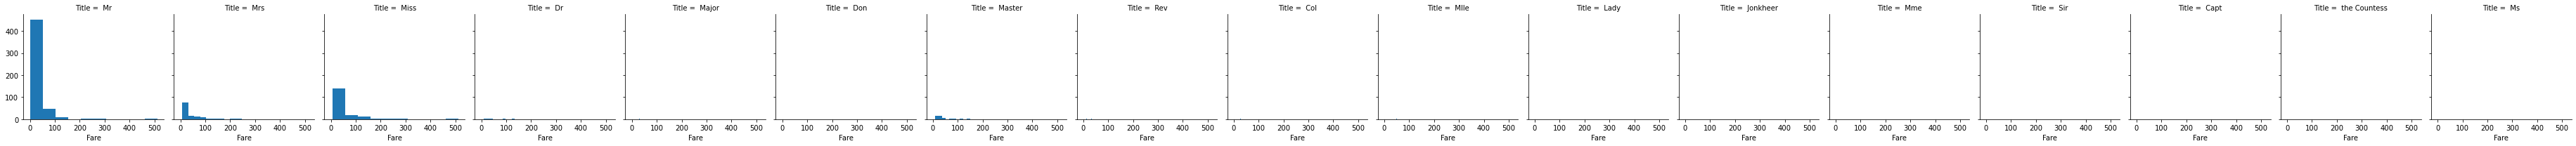

In [280]:
g1 = sns.FacetGrid(new_df,col='Title')
g1.map(plt.hist,'Fare',bins=10)

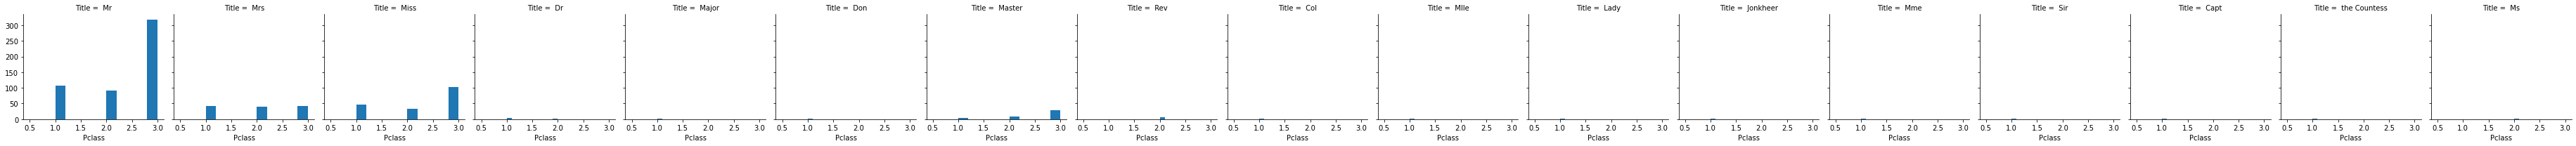

In [281]:
g1 = sns.FacetGrid(new_df,col='Title')
g1.map(plt.hist,'Pclass',bins=10)

In [282]:
cleanup= {"Title" : {" Capt":       "Officer",

                    " Col":        "Officer",

                    " Major":      "Officer",

                      " Dr":         "Officer",

                    " Rev":        "Officer",

                    " Jonkheer":   "Royalty",

                    " Don":        "Royalty",

                    " Sir" :       "Royalty",

                   " Lady" :      "Royalty",

                  " the Countess": "Royalty",

                    " Dona":       "Royalty",

                    " Mme":        "Miss",

                    " Mlle":       "Miss",

                    " Miss" :      "Miss",

                    " Ms":         "Mrs",

                    " Mr" :        "Mrs",

                    " Mrs" :       "Mrs",

                    " Master" :    "Master"

                    }}
 
new_df.replace(cleanup, inplace=True)



In [283]:
new_df['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

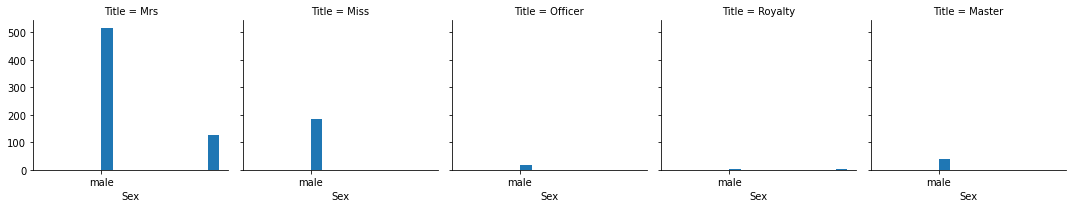

In [284]:
#VISUALIZATION OF THE CORRELATION BETWEEN TITLE AND OTHER FEATURES AFTER REPLACING THE VALUES
g2 = sns.FacetGrid(new_df,col='Title')
g2.map(plt.hist,'Sex',bins=10)

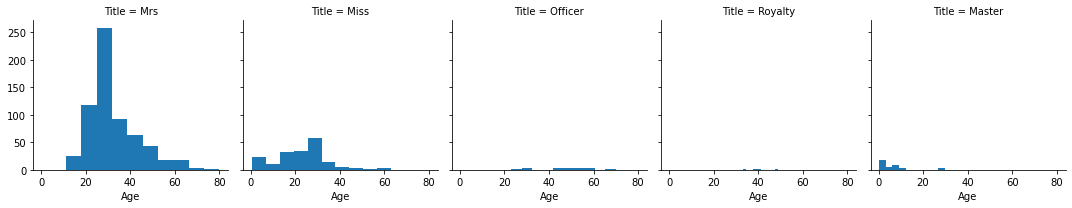

In [285]:
g1 = sns.FacetGrid(new_df,col='Title')
g1.map(plt.hist,'Age',bins=10)

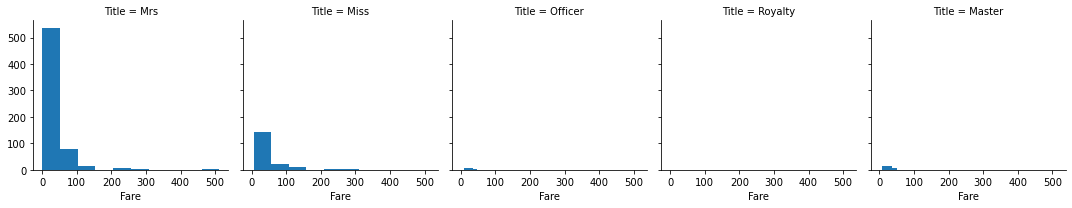

In [286]:
g1 = sns.FacetGrid(new_df,col='Title')
g1.map(plt.hist,'Fare',bins=10)

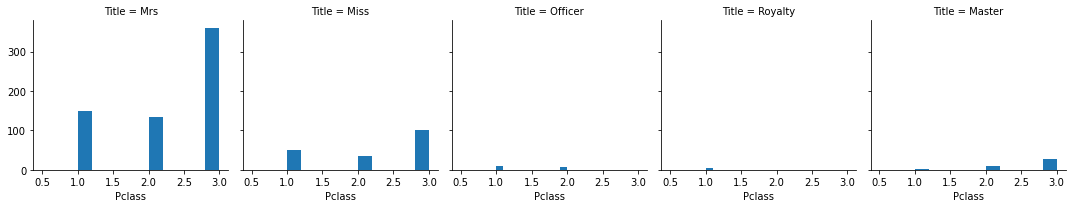

In [287]:
g1 = sns.FacetGrid(new_df,col='Title')
g1.map(plt.hist,'Pclass',bins=10)

In [288]:
#Creation of new column using the Parch and SbiSp named FamilySize
new_df['FamilySize']=new_df['SibSp'] + new_df['Parch'] + 1
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,male,28.000000,0,0,13.0000,S,Mrs,1
1,0,3,male,25.000000,0,0,7.6500,S,Mrs,1
2,0,3,male,20.000000,0,0,7.8542,S,Mrs,1
3,0,3,female,29.000000,0,4,21.0750,S,Mrs,5
4,0,1,male,31.000000,1,0,52.0000,S,Mrs,2
...,...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,C,Mrs,2
887,0,3,male,22.000000,0,0,7.2292,C,Mrs,1
888,0,3,female,30.000000,0,0,8.6625,S,Miss,1
889,0,3,male,29.699118,0,0,7.8958,S,Mrs,1


# the same work for the new feature

In [289]:
new_df['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [290]:
#there isn't a missing value
new_df['FamilySize'].isna().sum()

0

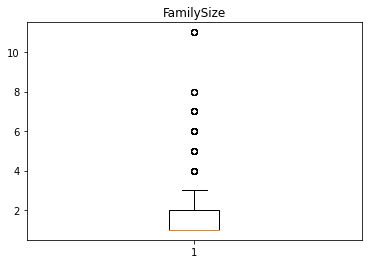

In [291]:
#Distribution of FamilySize
plt.boxplot(new_df['FamilySize'])
plt.title('FamilySize')
plt.show()

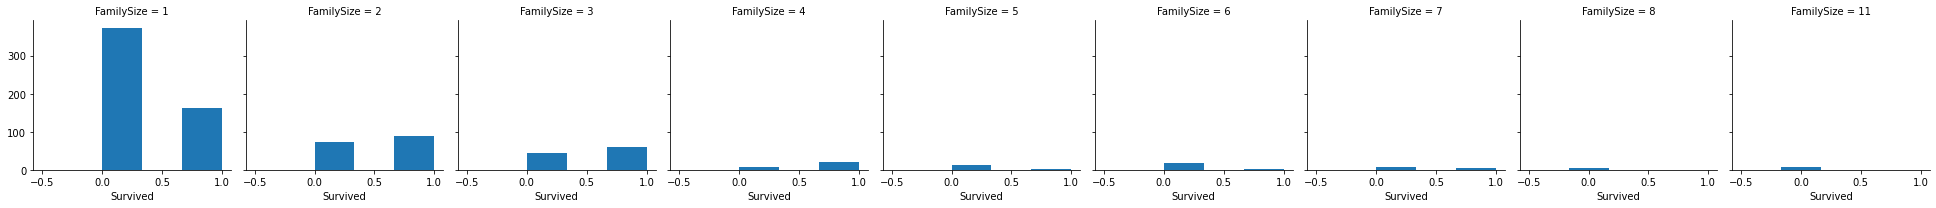

In [292]:
#As we can see the correlation between survived and FamilySize 
g1 = sns.FacetGrid(new_df,col='FamilySize')
g1.map(plt.hist,'Survived',bins=3)
#in this visualization, we can see the comparaison between the survived and not survived familySize 